In [2]:
import pandas as pd

In [3]:
customer_data = pd.read_csv("../data/customer_data_collection.csv")
product_data = pd.read_csv("../data/product_recommendation_data.csv")

In [4]:
product_data.shape

(10000, 15)

In [5]:
## we can simply drop the null columns
customer_data.dropna(inplace=True, axis=1)
product_data.dropna(inplace=True, axis=1)

In [6]:
customer_data.head()

,Customer_ID,Age,Gender,Location,Browsing_History,Purchase_History,Customer_Segment,Avg_Order_Value,Holiday,Season
0,C1000,28,Female,Chennai,"['Books', 'Fashion']","['Biography', 'Jeans']",New Visitor,4806.99,No,Winter
1,C1001,27,Male,Delhi,"['Books', 'Fitness', 'Fashion']","['Biography', 'Resistance Bands', 'T-shirt']",Occasional Shopper,795.03,Yes,Autumn
2,C1002,34,Other,Chennai,['Electronics'],['Smartphone'],Occasional Shopper,1742.45,Yes,Summer
3,C1003,23,Male,Bangalore,['Home Decor'],['Wall Art'],Frequent Buyer,2023.16,No,Autumn
4,C1004,24,Other,Kolkata,"['Fashion', 'Home Decor']","['Shoes', 'Lamp']",Frequent Buyer,794.76,No,Winter


In [7]:
product_data.head()

,Product_ID,Category,Subcategory,Price,Brand,Average_Rating_of_Similar_Products,Product_Rating,Customer_Review_Sentiment_Score,Holiday,Season,Geographical_Location,Similar_Product_List,Probability_of_Recommendation
0,P2000,Fashion,Jeans,1713,Brand B,4.2,2.3,0.26,No,Summer,Canada,"['Jeans', 'Shoes']",0.91
1,P2001,Beauty,Lipstick,1232,Brand C,4.7,2.1,0.21,Yes,Winter,India,"['Moisturizer', 'Lipstick', 'Lipstick']",0.26
2,P2002,Electronics,Laptop,4833,Brand B,3.5,2.4,0.74,Yes,Spring,Canada,"['Headphones', 'Headphones', 'Smartphone']",0.60
3,P2003,Books,Comics,4902,Brand D,3.4,4.2,0.80,No,Winter,Germany,"['Biography', 'Non-fiction', 'Comics']",0.36
4,P2004,Home Decor,Cushions,856,Brand C,3.2,3.3,0.08,Yes,Summer,USA,['Lamp'],0.37


In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  object 
 1   Age               10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Location          10000 non-null  object 
 4   Browsing_History  10000 non-null  object 
 5   Purchase_History  10000 non-null  object 
 6   Customer_Segment  10000 non-null  object 
 7   Avg_Order_Value   10000 non-null  float64
 8   Holiday           10000 non-null  object 
 9   Season            10000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 781.4+ KB


In [9]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_ID                          10000 non-null  object 
 1   Category                            10000 non-null  object 
 2   Subcategory                         10000 non-null  object 
 3   Price                               10000 non-null  int64  
 4   Brand                               10000 non-null  object 
 5   Average_Rating_of_Similar_Products  10000 non-null  float64
 6   Product_Rating                      10000 non-null  float64
 7   Customer_Review_Sentiment_Score     10000 non-null  float64
 8   Holiday                             10000 non-null  object 
 9   Season                              10000 non-null  object 
 10  Geographical_Location               10000 non-null  object 
 11  Similar_Product_List                10000 

In [10]:
# Check unique values in categorical columns
for col in ['Gender', 'Location', 'Customer_Segment', 'Holiday', 'Season']:
    print(f"{col} Unique Values: {customer_data[col].unique()}\n")

# Check price distribution
print(product_data['Price'].describe())

# Check recommendation probability distribution
print(product_data['Probability_of_Recommendation'].describe())


Gender Unique Values: ['Female' 'Male' 'Other']

Location Unique Values: ['Chennai' 'Delhi' 'Bangalore' 'Kolkata' 'Mumbai']

Customer_Segment Unique Values: ['New Visitor' 'Occasional Shopper' 'Frequent Buyer']

Holiday Unique Values: ['No' 'Yes']

Season Unique Values: ['Winter' 'Autumn' 'Summer' 'Spring']

count    10000.00000
mean      2552.36510
std       1413.52875
min        100.00000
25%       1325.00000
50%       2585.00000
75%       3755.00000
max       5000.00000
Name: Price, dtype: float64
count    10000.000000
mean         0.551110
std          0.260091
min          0.100000
25%          0.330000
50%          0.550000
75%          0.780000
max          1.000000
Name: Probability_of_Recommendation, dtype: float64


In [11]:
# Convert text data to lowercase for consistency
customer_data['Gender'] = customer_data['Gender'].str.lower()
customer_data['Location'] = customer_data['Location'].str.lower()
customer_data['Customer_Segment'] = customer_data['Customer_Segment'].str.lower()
customer_data['Holiday'] = customer_data['Holiday'].str.lower()
customer_data['Season'] = customer_data['Season'].str.lower()

product_data['Category'] = product_data['Category'].str.lower()
product_data['Subcategory'] = product_data['Subcategory'].str.lower()
product_data['Brand'] = product_data['Brand'].str.lower()
product_data['Holiday'] = product_data['Holiday'].str.lower()
product_data['Season'] = product_data['Season'].str.lower()


In [12]:
customer_data.to_csv("../data/cleaned_customer_data.csv", index=False)
product_data.to_csv("../data/cleaned_product_data.csv", index=False)


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


# Define column groups
categorical_features = ['Gender', 'Customer_Segment', 'Location']
numerical_features = ['Age', 'Avg_Order_Value']
text_features = ['Browsing_History', 'Purchase_History']

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Preprocessing pipeline for non-text data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Fit and Transform non-text data
customer_transformed = preprocessor.fit_transform(customer_data)

# Get feature names after One-Hot Encoding
encoded_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numerical_columns = numerical_features

# Process text columns separately using TF-IDF
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
browsing_tfidf = tfidf.fit_transform(customer_data['Browsing_History']).toarray()
purchase_tfidf = tfidf.fit_transform(customer_data['Purchase_History']).toarray()

# Create proper column names for TF-IDF features
browsing_tfidf_columns = [f"Browsing_TFIDF_{i}" for i in range(browsing_tfidf.shape[1])]
purchase_tfidf_columns = [f"Purchase_TFIDF_{i}" for i in range(purchase_tfidf.shape[1])]

# Merge all processed features
final_data = np.hstack((customer_transformed, browsing_tfidf, purchase_tfidf))

# Create DataFrame with proper column names
final_columns = list(encoded_categorical_columns) + numerical_columns + browsing_tfidf_columns + purchase_tfidf_columns
customer_encoded_df = pd.DataFrame(final_data, columns=final_columns)

# Check final DataFrame
print(customer_encoded_df.head())


   Gender_female  Gender_male  Gender_other  Customer_Segment_frequent buyer  \
0            1.0          0.0           0.0                              0.0   
1            0.0          1.0           0.0                              0.0   
2            0.0          0.0           1.0                              0.0   
3            0.0          1.0           0.0                              1.0   
4            0.0          0.0           1.0                              1.0   

   Customer_Segment_new visitor  Customer_Segment_occasional shopper  \
0                           1.0                                  0.0   
1                           0.0                                  1.0   
2                           0.0                                  1.0   
3                           0.0                                  0.0   
4                           0.0                                  0.0   

   Location_bangalore  Location_chennai  Location_delhi  Location_kolkata  \
0        

In [14]:
print("Shape of product_transformed:", product_transformed.shape)
print("Shape of similar_product_tfidf:", similar_product_tfidf.shape)


NameError: name 'product_transformed' is not defined

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define column groups
categorical_features = ['Category', 'Subcategory', 'Brand', 'Holiday', 'Season', 'Geographical_Location']
numerical_features = ['Price', 'Product_Rating', 'Customer_Review_Sentiment_Score', 
                    'Probability_of_Recommendation', 'Average_Rating_of_Similar_Products']
text_features = ['Similar_Product_List']

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Preprocessing pipeline for non-text data
preprocessor = ColumnTransformer(
    transformers=[ 
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
    ]
)

# Fit and Transform non-text data
product_transformed = preprocessor.fit_transform(product_data)

# Ensure that product_transformed is a dense array if it's sparse
product_transformed = product_transformed.toarray() if isinstance(product_transformed, np.ndarray) == False else product_transformed

# Print shape to debug
print("Shape of product_transformed:", product_transformed.shape)

# **TF-IDF for Similar_Product_List**
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
similar_product_tfidf = tfidf.fit_transform(product_data['Similar_Product_List']).toarray()

# Print shape to debug
print("Shape of similar_product_tfidf:", similar_product_tfidf.shape)

# **Ensure both arrays are 2D before stacking**
final_data = np.hstack([product_transformed, similar_product_tfidf])

# Get feature names
encoded_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numerical_columns = numerical_features
similar_product_tfidf_columns = [f"Similar_Product_TFIDF_{i}" for i in range(similar_product_tfidf.shape[1])]

# Create DataFrame with proper column names
final_columns = list(encoded_categorical_columns) + numerical_columns + similar_product_tfidf_columns
product_encoded_df = pd.DataFrame(final_data, columns=final_columns)

# Check final DataFrame
product_encoded_df.head()

Shape of product_transformed: (10000, 50)
Shape of similar_product_tfidf: (10000, 27)


,Category_beauty,Category_books,Category_electronics,Category_fashion,Category_fitness,Category_home decor,Subcategory_biography,Subcategory_comics,Subcategory_curtains,Subcategory_cushions,...,Similar_Product_TFIDF_17,Similar_Product_TFIDF_18,Similar_Product_TFIDF_19,Similar_Product_TFIDF_20,Similar_Product_TFIDF_21,Similar_Product_TFIDF_22,Similar_Product_TFIDF_23,Similar_Product_TFIDF_24,Similar_Product_TFIDF_25,Similar_Product_TFIDF_26
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.709681,0.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.451043,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.522758,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [16]:
customer_encoded_df.shape, product_encoded_df.shape

((10000, 47), (10000, 77))

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Define Features (X) and Target (y)
X_product = product_encoded_df.drop('Probability_of_Recommendation', axis=1)  # Features
y_product = product_encoded_df['Probability_of_Recommendation']  # Continuous target variable

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train_product, X_test_product, y_train_product, y_test_product = train_test_split(X_product, y_product, test_size=0.25, random_state=95)

# Step 3: Train a RandomForestRegressor
model_regressor = RandomForestRegressor(random_state=95)

# Train the model with the training data
model_regressor.fit(X_train_product, y_train_product)

# Step 4: Make Predictions
y_pred_product = model_regressor.predict(X_test_product)

# Step 5: Evaluate the Model using Mean Squared Error (MSE) for regression tasks
mse = mean_squared_error(y_test_product, y_pred_product)
print(f"Mean Squared Error: {mse:.4f}")

# Optionally, you can calculate the R^2 score for regression performance
r2_score = model_regressor.score(X_test_product, y_test_product)
print(f"R^2 Score: {r2_score:.4f}")


Mean Squared Error: 1.0296
R^2 Score: -0.0392


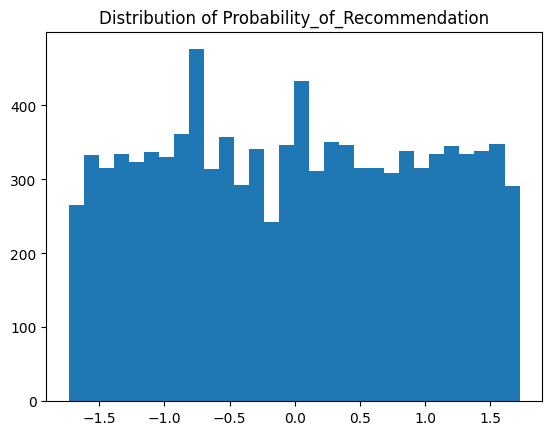

In [18]:
import matplotlib.pyplot as plt

plt.hist(y_product, bins=30)
plt.title("Distribution of Probability_of_Recommendation")
plt.show()


In [19]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
# grid_search.fit(X_train_product, y_train_product)

# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Best CV Score: {grid_search.best_score_}")


# Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
# Best CV Score: -0.007850795067157579


In [20]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(random_state=95)
model_xgb.fit(X_train_product, y_train_product)

y_pred_xgb = model_xgb.predict(X_test_product)
mse_xgb = mean_squared_error(y_test_product, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.4f}")


XGBoost MSE: 1.1368


In [ ]:
### Not done anything in the model training